In [1]:
import pandas as pd
import math
from shapely.geometry import Point, LineString, Polygon
from pyproj import Proj, transform
from matplotlib import pyplot as plt

In [2]:
bike_df_orig = pd.read_excel('data/Final_Bike_Collision_Database.xlsx')


In [3]:
#Clean up begins
#drop rows with missing locations, since location is the most important part of this exploration
bike_df = pd.DataFrame(bike_df_orig[(bike_df_orig.Xkm > 0) & (bike_df_orig.Ykm > 0)])

In [27]:
len(bike_df[bike_df['ID'] == None])

0

In [32]:
#This just determines that a lot of bike accidents are close to one another
#What I really need is to get them organized by clusters

#I'm going to build a brand new dataframe organized by clusters instead of individual accidents
#Every accident must have been within 50m of every other accident in the cluster

#Create list of points and lines and ids
#bike_df = bike_df.sort_values(by='Xkm').reset_index()
acc_clusters = []
for index, row in bike_df.iterrows():
    if (index == 0):
        point = Point(row['Xkm'], row['Ykm'])
        acc_clusters.append({'shape': point, 'accident_ids': [row['ID']], 'buffer': point.buffer(50)})
    else: 
        cluster_found = False
        for counter, item in enumerate(acc_clusters):
            point = Point(row['Xkm'], row['Ykm'])
            if (point.within(item['buffer'])):
                cluster_found = True
                if (item['shape'].geom_type == 'Point'):
                    new_shape = LineString([item['shape'], point])
                else:
                    point_list = list(item['shape'].coords)
                    point_list.append(point)
                    new_shape = LineString(point_list)
                new_buffer = new_shape.buffer(50)
                acc_clusters[counter]['accident_ids'].append(row['ID'])
                acc_clusters[counter]['shape'] = new_shape
                acc_clusters[counter]['buffer'] = new_buffer
        if not cluster_found:
            acc_clusters.append({'shape': point, 'accident_ids': [row['ID']], 'buffer': point.buffer(50)})

   

print(len(acc_clusters))
#acc_clusters

997


LINESTRING (231203.176793 900199.040998, 231167.889493 900199.6538570001, 231147.659167 900234.824498, 231106.949365 900241.6909179999, 231183.998107 900197.264133, 231199.12488 900198.1487819999, 231167.889558 900199.653679, 231167.889558 900199.653679, 231146.411381 900202.839942, 231203.176979 900199.040772)
POINT (233984.572264 897655.138169)
LINESTRING (239308.085183 903574.2767479999, 239308.085145 903574.276607)
POINT (236029.64835 899772.501906)
POINT (230874.809746 892940.833772)
POINT (236028.904625 900669.40227)
LINESTRING (233853.699392 900028.0316399999, 233853.699392 900028.0316399999, 233853.699392 900028.0316399999, 233861.709533 899995.3835380001, 233849.948958 900025.084564, 233837.017939 900070.16056, 233853.699568 900028.031429, 233861.709679 899995.38332)
LINESTRING (234581.679176 899650.778844, 234578.163865 899646.9766779999)
LINESTRING (234820.133259 900036.085924, 234820.133259 900036.085924)
LINESTRING (234451.095344 899995.3470909999, 234461.124992 900008.981

C:\Users\linne\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


LINESTRING (233207.411327 898016.645254, 233237.304355 897997.217139, 233203.313804 897998.878577)
LINESTRING (230498.984601 901470.008556, 230498.984601 901470.008556, 230498.98481 901470.008534, 230498.984699 901470.0085, 230498.984699 901470.0085, 230498.984699 901470.0085)
POINT (233893.077313 897157.98508)
POINT (232780.454538 895536.543423)
LINESTRING (234459.32008 899517.796861, 234459.32008 899517.796861, 234459.32008 899517.796861, 234459.32008 899517.796861, 234459.32008 899517.796861, 234459.32008 899517.796861, 234459.320078 899517.796698, 234459.840541 899511.263764)
POINT (236508.150411 895976.213594)
LINESTRING (233898.845698 899896.885673, 233886.239027 899943.769509, 233886.239027 899943.769509, 233886.239027 899943.769509, 233886.239027 899943.769509, 233886.239027 899943.769509, 233886.239027 899943.769509, 233886.239027 899943.769509, 233902.910373 899900.435378, 233902.910373 899900.435378, 233902.910373 899900.435378, 233902.910373 899900.435378, 233902.921145 899

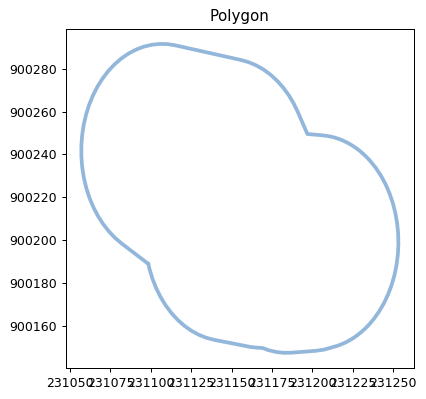

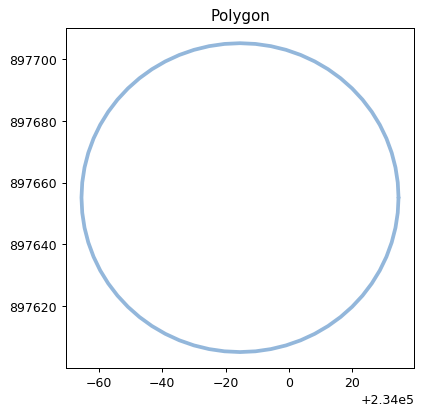

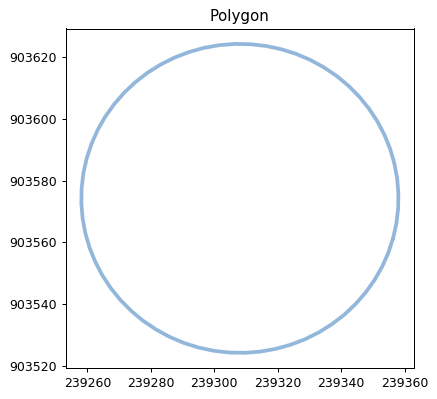

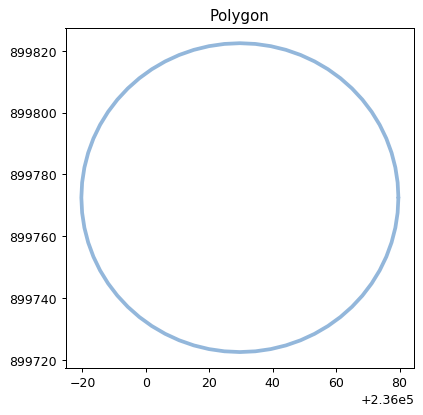

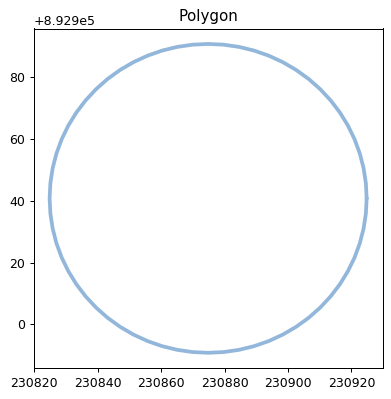

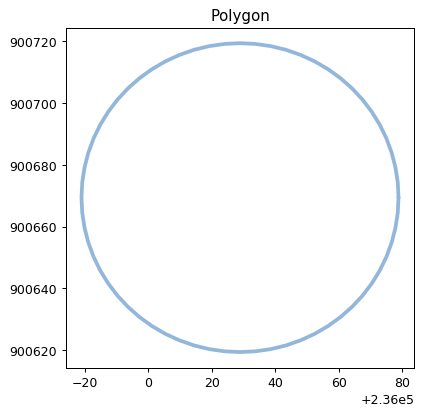

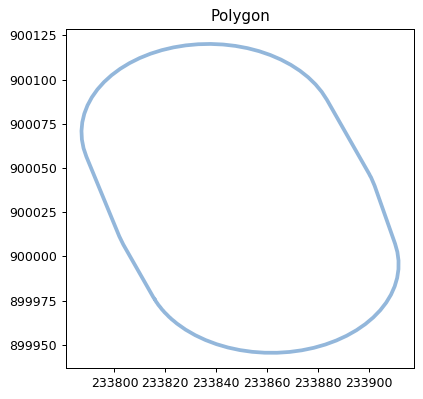

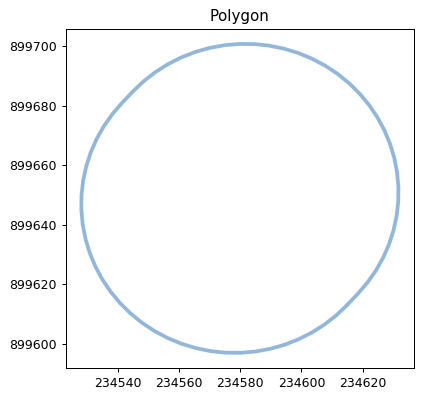

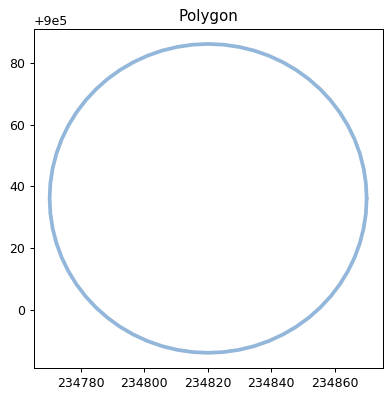

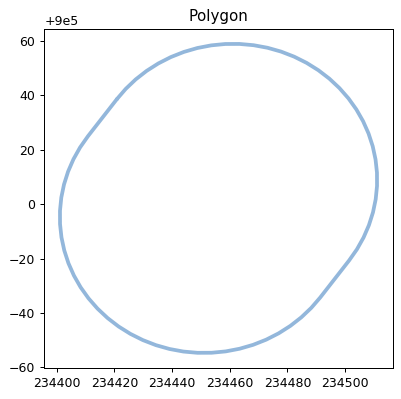

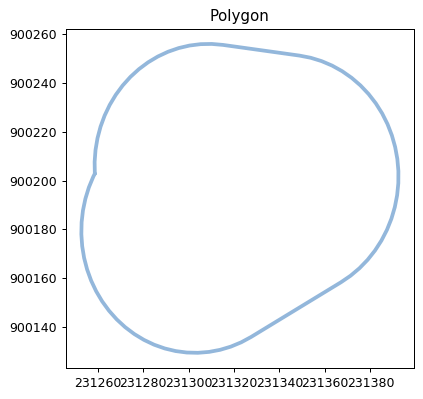

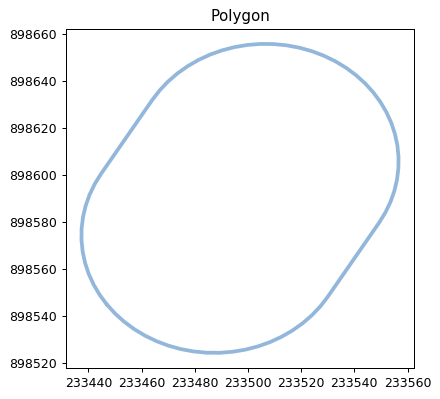

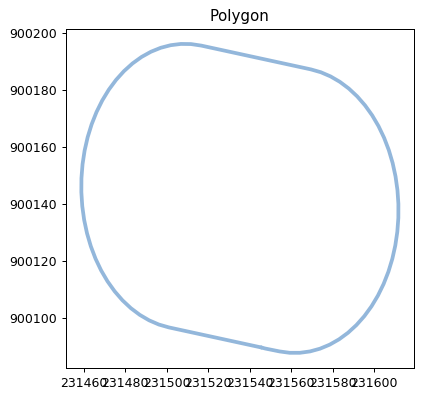

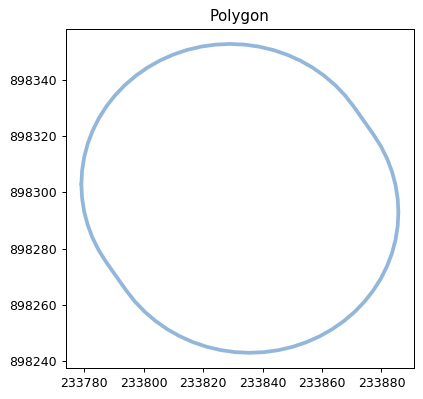

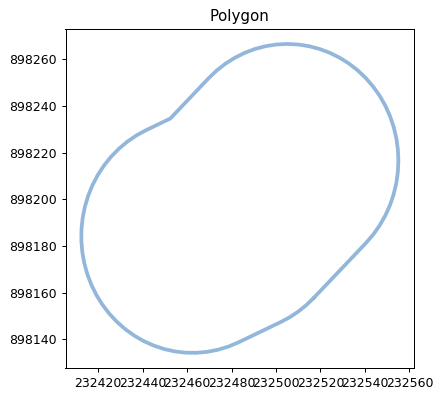

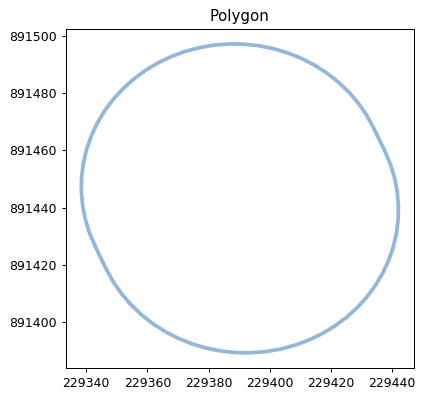

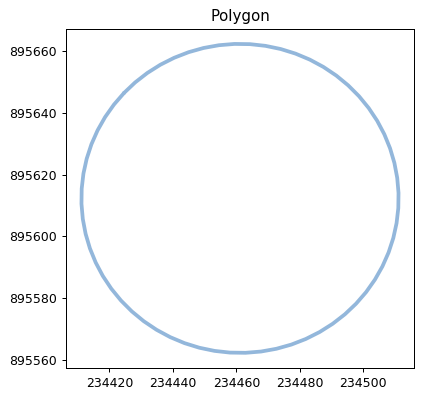

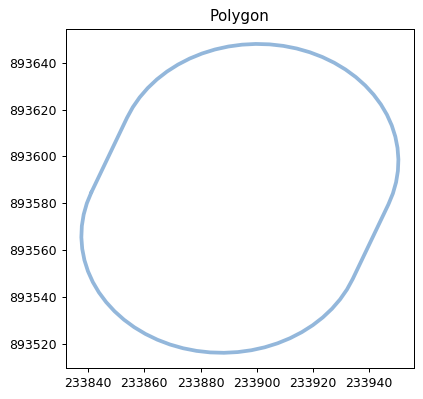

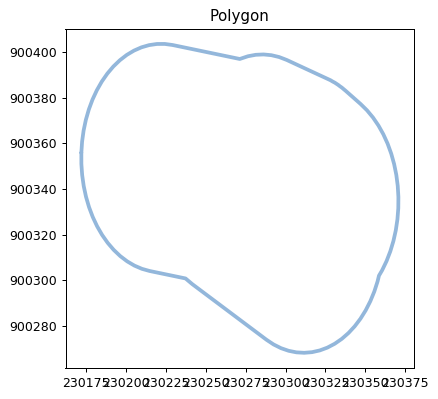

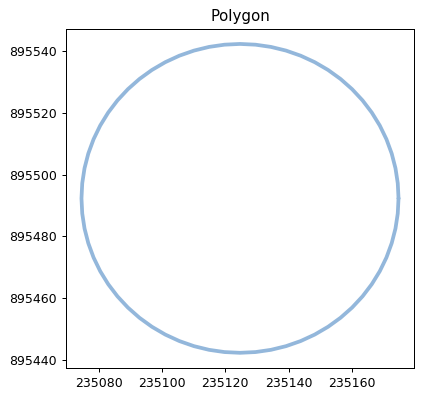

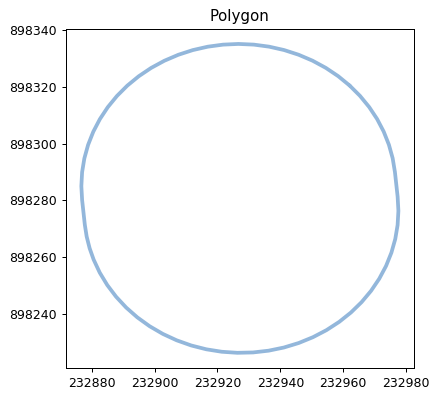

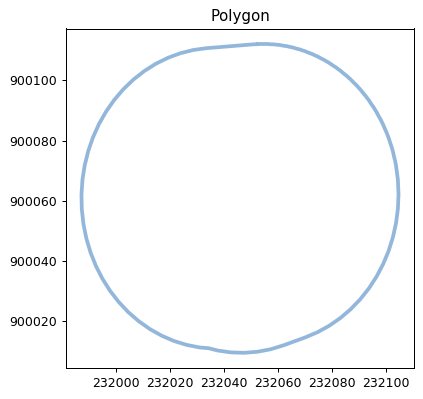

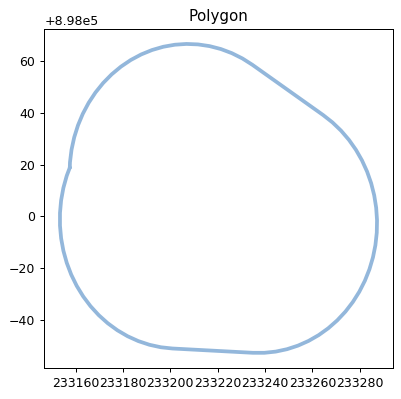

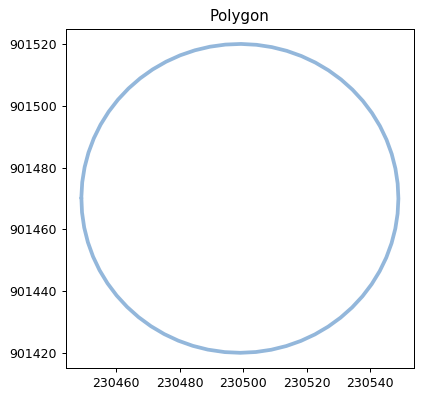

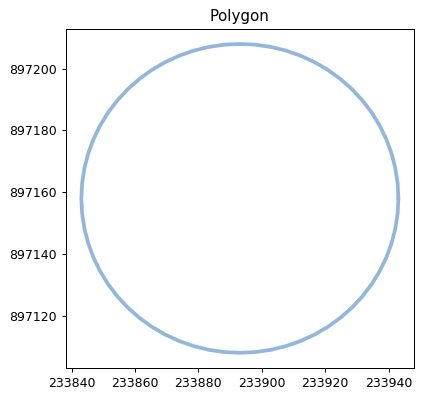

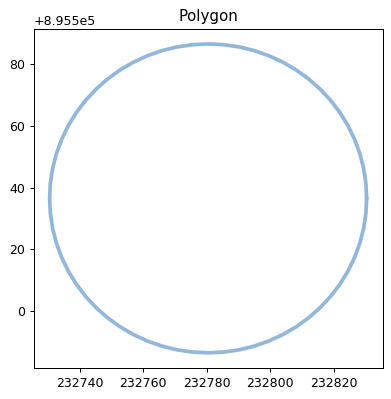

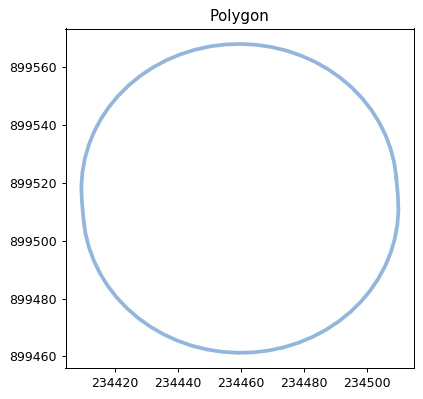

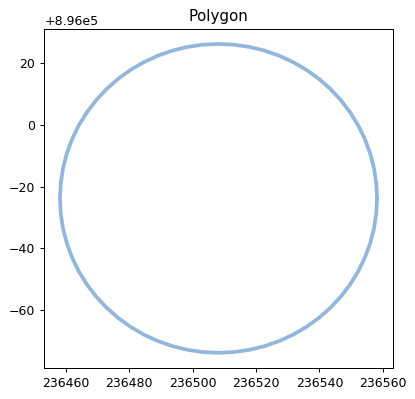

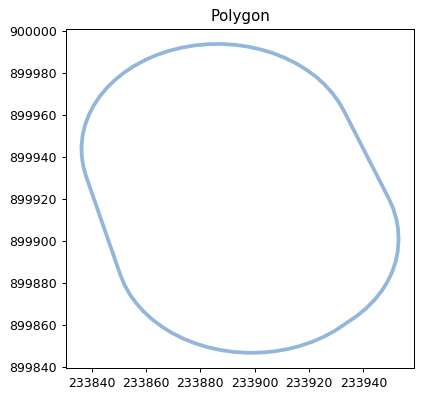

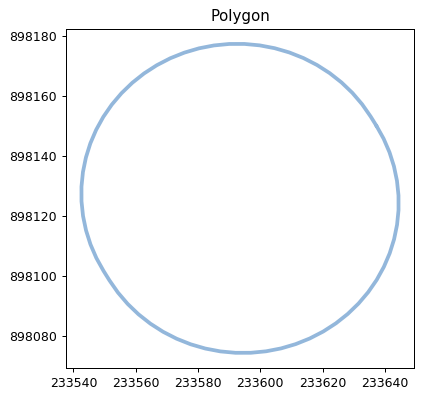

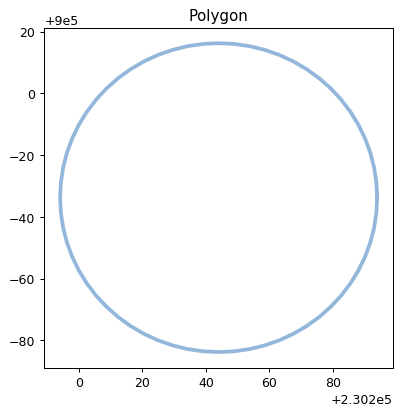

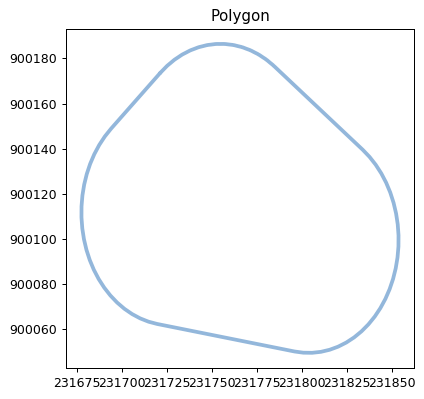

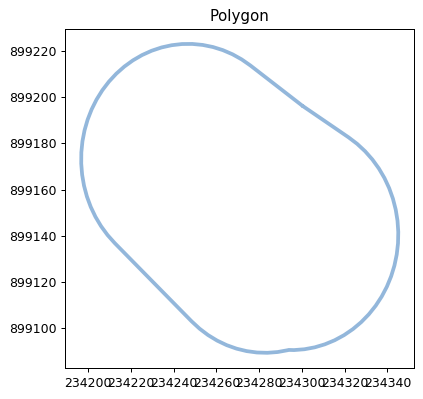

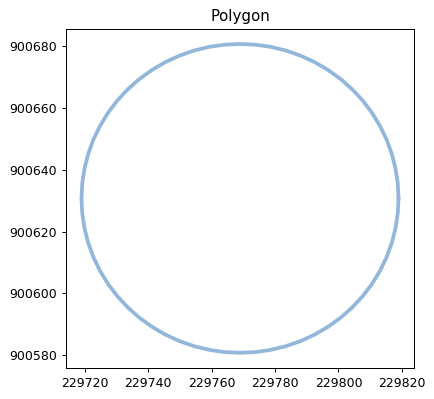

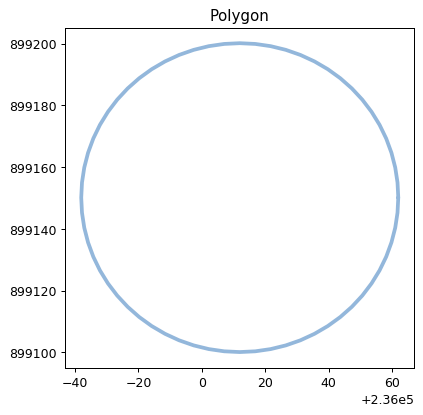

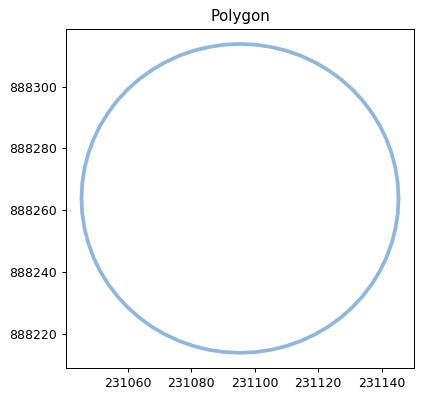

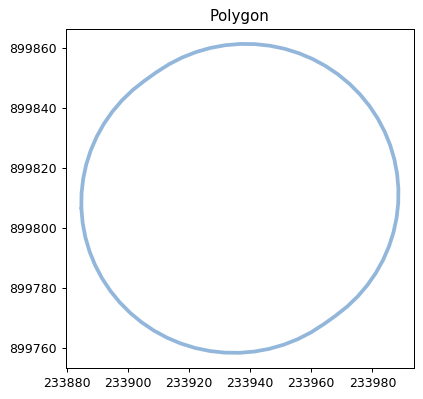

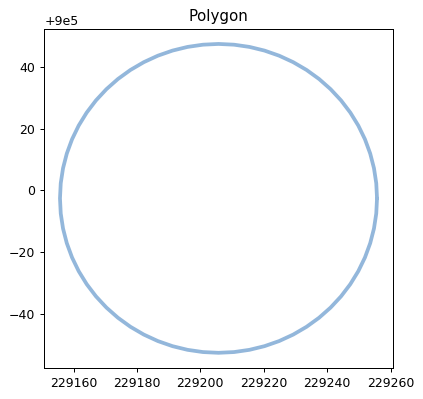

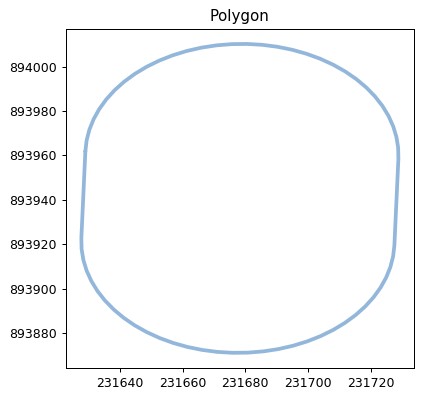

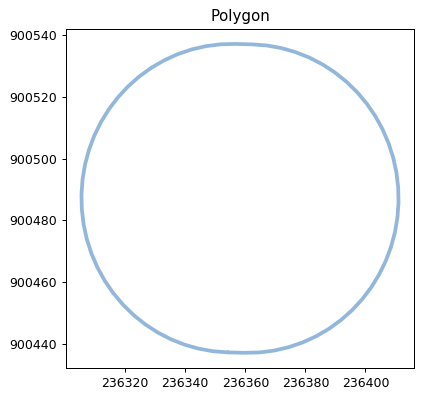

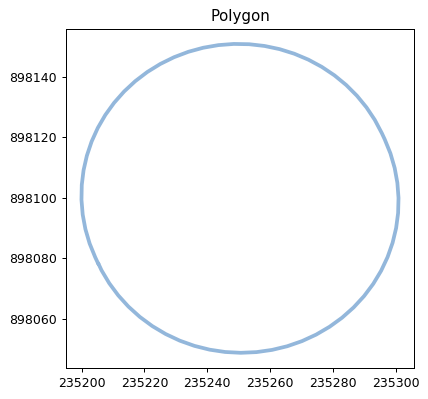

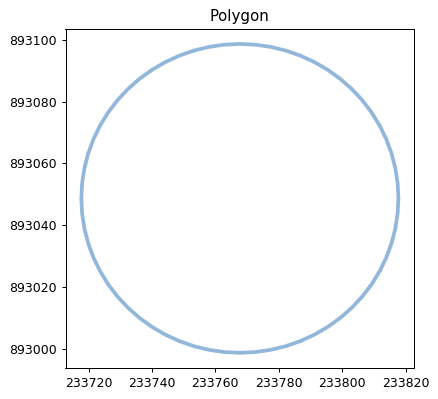

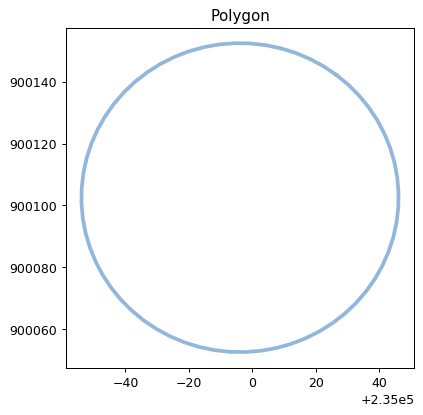

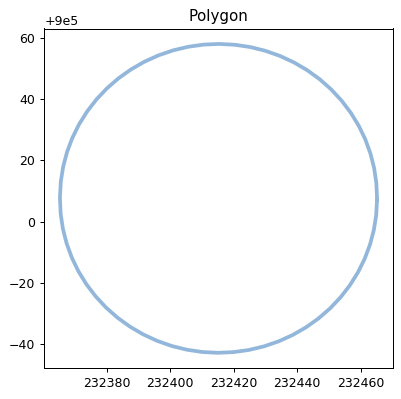

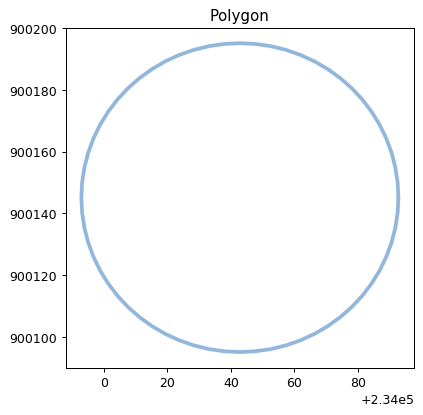

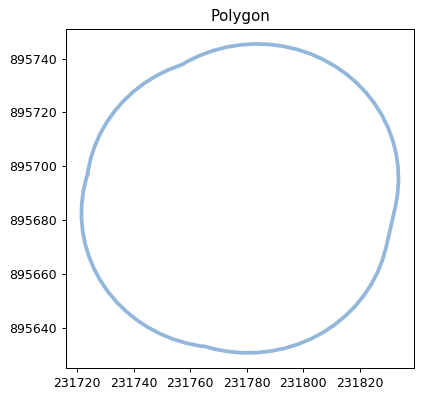

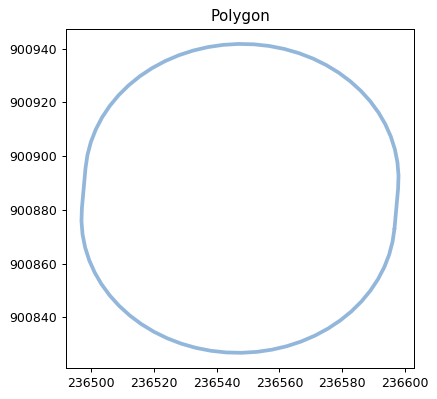

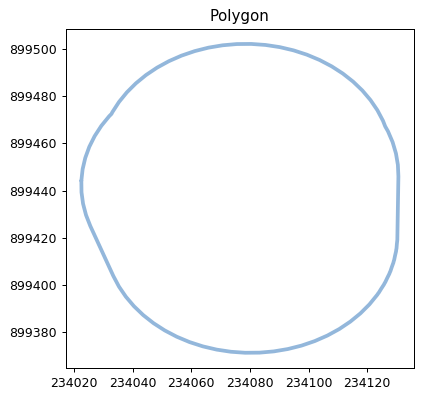

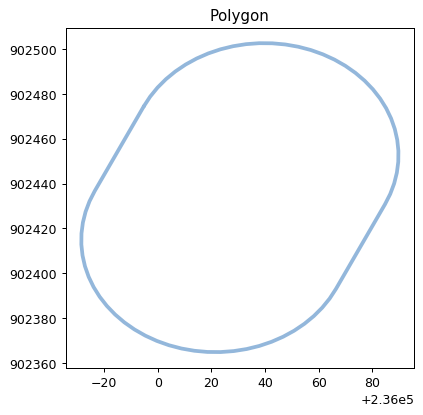

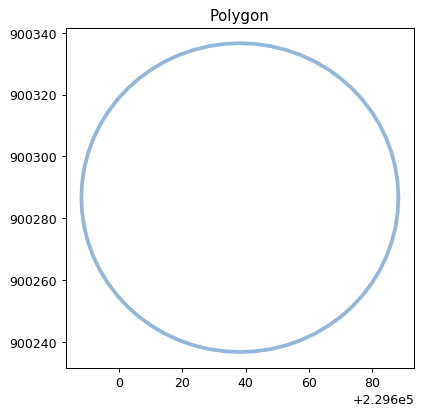

In [35]:
for i in range(50):
    x,y = acc_clusters[i]['buffer'].exterior.xy
    print(acc_clusters[i]['shape'])
    fig = plt.figure(i, figsize=(5,5), dpi=90)
    ax = fig.add_subplot(111)
    ax.plot(x, y, color='#6699cc', alpha=0.7,
        linewidth=3, solid_capstyle='round', zorder=2)
    ax.set_title('Polygon')

In [98]:
# make lists of length one into points, lists of length greater than one into Line strings
for counter, item in enumerate(acc_clusters):
    if (len(item['shape']) > 1):
        acc_clusters[counter]['shape'] = LineString(item['shape'])
    else:
        acc_clusters[counter]['shape'] = item['shape'][0]



In [99]:
#add a 50m buffer around the shapes
for counter, item in enumerate(acc_clusters):
    acc_clusters[counter]['buffer'] = item['shape'].buffer(50)



LINESTRING (228631.600994 898608.079262, 228654.864489 898573.12755, 228665.868376 892231.830995)


Text(0.5, 1.0, 'Polygon')

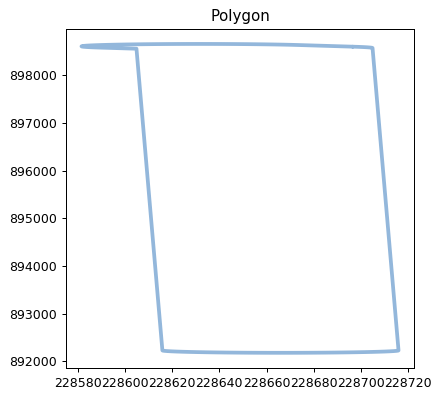

In [100]:
x,y = acc_clusters[50]['buffer'].exterior.xy
print(acc_clusters[50]['shape'])
fig = plt.figure(1, figsize=(5,5), dpi=90)
ax = fig.add_subplot(111)
ax.plot(x, y, color='#6699cc', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)
ax.set_title('Polygon')

In [74]:
#This just determines that a lot of bike accidents are close to one another
#What I really need is to get them organized by clusters

#I'm going to build a brand new dataframe organized by clusters instead of individual accidents
#Every accident must have been within 50m of every other accident in the cluster
#Each cluster will have an accident score, which is the number of accidents
#Each cluster will have points determining its perimeter, which will be 50m outside of the accidents
#Each cluster will have the following attributes:
    # XTop - 50m away from top Xkm
    # XBottom - 50m away from bottom Xkm
    # Ytop - 50m away from top Ykm
    # YBottom - 50m away from bottom Ykm
    # accidents, a list of tuples of (ID, Xkm, Ykm) for all accidents in the cluster

def isWithin(x, y, XTop, XBottom, YTop, YBottom):
    result = False
    if (x < XTop and x > XBottom and y < YTop and y > YBottom):
        result = True
    return result
    
acc_clusters = []
for index, row in bike_df.head(100).iterrows():
    acc_id, Xkm, Ykm = row['ID'], row['Xkm'], row['Ykm']
    added = False
    for cluster in acc_clusters:
        if isWithin(Xkm, Ykm, cluster['XTop'], cluster['XBottom'], cluster['YTop'], cluster['YBottom']):
            for acc in cluster['accidents']:
                if (calcDistance(Xkm, Ykm, acc[1], acc[2]) < 50):
                    if (Xkm + 50 > cluster['XTop']):
                        cluster['XTop'] = Xkm + 50
                    elif (Xkm - 50 < cluster['XBottom']):
                        cluster['XBottom'] = Xkm - 50
                    if (Ykm + 50 > cluster['YTop']):
                        cluster['YTop'] = Ykm + 50
                    elif (Ykm - 50 < cluster['YBottom']):
                        cluster['YBottom'] = Ykm - 50
                    cluster['accidents'].append((acc_id, Xkm, Ykm))
                    added = True
    if not added:
        cluster = {'XTop': Xkm + 50, 
                   'XBottom': Xkm - 50,
                  'YTop': Ykm + 50,
                  'YBottom': Ykm - 50,
                  'accidents': [(acc_id, Xkm, Ykm)]}
        acc_clusters.append(cluster)
acc_clusters

KeyboardInterrupt: 

In [6]:
bike_df[['Address', 'Xkm', 'Ykm']].head()

,Address,Xkm,Ykm
0,1001 Commonwealth Ave,231203.176793,900199.040998
1,280 Brighton Ave,NaN,900400.976894
2,50 Kenilworth St,233984.572264,897655.138169
3,584 Saratoga St,239308.085183,903574.276748
4,222 Harrison Ave,236029.648350,899772.501906


In [7]:
bike_df['Xkm'].max()

241169.656466

In [8]:
bike_df['Xkm'].min()

226872.564379

In [9]:
bike_df['Ykm'].max()

904055.441186

In [10]:
bike_df['Ykm'].min()

887256.463784

In [16]:
inProj = Proj('epsg:26986')
outProj = Proj('epsg:4326')
xmax,ymax = bike_df['Xkm'].max(),bike_df['Ykm'].max()
xmax2,ymax2 = transform(inProj,outProj,xmax,ymax)
print ('Upper Right: ')
print (xmax2,ymax2)

xmin,ymin = bike_df['Xkm'].min(),bike_df['Ykm'].min()
xmin2,ymin2 = transform(inProj,outProj,xmin,ymin)

print('Bottom Right:')
print(xmin2, ymax2)

print('Top Right: ')
print(xmax2, ymin2)

print ('Bottom Left: ')
print (xmin2,ymin2)

Upper Right: 
42.385920811282396 -71.00003640589748
Bottom Right:
42.23530626734878 -71.00003640589748
Top Right: 
42.385920811282396 -71.17443656586595
Bottom Left: 
42.23530626734878 -71.17443656586595


In [70]:
bike_df[['XFINAL', 'Xkm', 'YFINAL', 'Ykm']]

,XFINAL,Xkm,YFINAL,Ykm
0,758540.606275,231203.176793,2.953409e+06,900199.040998
1,754177.666510,NaN,2.954071e+06,900400.976894
2,767665.919501,233984.572264,2.945063e+06,897655.138169
3,785131.513067,239308.085183,2.964483e+06,903574.276748
4,774375.486713,236029.648350,2.952010e+06,899772.501906
...,...,...,...,...
1803,761171.822976,232005.171643,2.946305e+06,898033.855044
1804,NaN,NaN,NaN,NaN
1805,NaN,NaN,NaN,NaN
1806,NaN,NaN,NaN,NaN


In [4]:
car_df = pd.read_csv('data/US_Accidents_Dec19.csv')
car_df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [55]:
car_acc_df = pd.read_csv('data/2019_Crashes_.csv')


In [52]:
for col in car_acc_df.columns:
    print(col)

OBJECTID
CRASH_NUMB
CITY_TOWN_NAME
CRASH_DATE
CRASH_HOUR
CRASH_TIME_2
CRASH_STATUS
CRASH_SEVERITY_DESCR
MAX_INJR_SVRTY_CL
NUMB_VEHC
NUMB_NONFATAL_INJR
NUMB_FATAL_INJR
POLC_AGNCY_TYPE_DESCR
MANR_COLL_DESCR
VEHC_MNVR_ACTN_CL
VEHC_TRVL_DIRC_CL
VEHC_SEQ_EVENTS_CL
AMBNT_LIGHT_DESCR
WEATH_COND_DESCR
ROAD_SURF_COND_DESCR
FIRST_HRMF_EVENT_DESCR
MOST_HRMFL_EVT_CL
DRVR_CNTRB_CIRC_CL
VEHC_CONFIG_CL
STREET_NUMB
RDWY
DIST_DIRC_FROM_INT
NEAR_INT_RDWY
MM_RTE
DIST_DIRC_MILEMARKER
MILEMARKER
EXIT_RTE
DIST_DIRC_EXIT
EXIT_NUMB
DIST_DIRC_LANDMARK
LANDMARK
RDWY_JNCT_TYPE_DESCR
TRAF_CNTRL_DEVC_TYPE_DESCR
TRAFY_DESCR_DESCR
JURISDICTN
FIRST_HRMF_EVENT_LOC_DESCR
NON_MTRST_TYPE_CL
NON_MTRST_ACTN_CL
NON_MTRST_LOC_CL
IS_GEOCODED
GEOCODING_METHOD_NAME
X
Y
LAT
LON
RMV_DOC_IDS
CRASH_RPT_IDS
YEAR
AGE_DRVR_YNGST
AGE_DRVR_OLDEST
AGE_NONMTRST_YNGST
AGE_NONMTRST_OLDEST
DRVR_DISTRACTED_CL
DISTRICT_NUM
RPA_ABBR
VEHC_EMER_USE_CL
VEHC_TOWED_FROM_SCENE_CL
CNTY_NAME
FMCSA_RPTBL_CL
FMCSA_RPTBL
HIT_RUN_DESCR
LCLTY_NAME
ROAD_CNTR

In [9]:
small_df = car_acc_df[['CITY_TOWN_NAME', 'STREET_NUMB', 'DIST_DIRC_FROM_INT', 'NEAR_INT_RDWY', 'MM_RTE', 'X', 'Y', 'LAT', 'LON']]
small_df.head()

,CITY_TOWN_NAME,STREET_NUMB,DIST_DIRC_FROM_INT,NEAR_INT_RDWY,MM_RTE,X,Y,LAT,LON
0,ATTLEBORO,787,NaN,NaN,NaN,215161.511507,854356.129054,41.939413,-71.317171
1,SALEM,NaN,NaN,NaN,NaN,250114.124768,919085.062401,42.520699,-70.890113
2,SALEM,NaN,NaN,NaN,NaN,250148.187616,919544.562433,42.524834,-70.889659
3,EVERETT,NaN,NaN,NaN,NaN,237161.046996,905476.187380,42.398912,-71.048625
4,HAVERHILL,NaN,NaN,NaN,NaN,237365.471188,946305.656602,42.766455,-71.043487


In [21]:
small2_df = car_acc_df[['HIT_RUN_DESCR', 'ROAD_CNTRB_DESCR']]
small2_df.head()

,HIT_RUN_DESCR,ROAD_CNTRB_DESCR
0,"Yes, hit and run",None
1,No hit and run,"Road surface condition (wet, icy, snow, slush,..."
2,No hit and run,None
3,No hit and run,None
4,No hit and run,None


In [44]:
data_row = list(car_acc_df.loc[[0]].to_numpy()[0])
data_cols = list(car_acc_df.columns)
list_of_tuples = list(zip(data_cols, data_row))
#list_of_tuples[0]
list_of_tuples

[('OBJECTID', 2504847),
 ('CRASH_NUMB', 4643564),
 ('CITY_TOWN_NAME', 'ATTLEBORO'),
 ('CRASH_DATE', '2019-01-01T06:00:00.000Z'),
 ('CRASH_HOUR', '01:00AM to 01:59AM'),
 ('CRASH_TIME_2', '01:00 AM'),
 ('CRASH_STATUS', 'Open'),
 ('CRASH_SEVERITY_DESCR', 'Property damage only (none injured)'),
 ('MAX_INJR_SVRTY_CL', 'No injury'),
 ('NUMB_VEHC', 1),
 ('NUMB_NONFATAL_INJR', 0),
 ('NUMB_FATAL_INJR', 0),
 ('POLC_AGNCY_TYPE_DESCR', 'Local police'),
 ('MANR_COLL_DESCR', 'Single vehicle crash'),
 ('VEHC_MNVR_ACTN_CL', 'V1: Travelling straight ahead'),
 ('VEHC_TRVL_DIRC_CL', 'V1: E'),
 ('VEHC_SEQ_EVENTS_CL',
  ' V1:(Collision with embankment),(Collision with fence)'),
 ('AMBNT_LIGHT_DESCR', 'Dark - lighted roadway'),
 ('WEATH_COND_DESCR', 'Rain'),
 ('ROAD_SURF_COND_DESCR', 'Wet'),
 ('FIRST_HRMF_EVENT_DESCR', 'Collision with embankment'),
 ('MOST_HRMFL_EVT_CL', 'V1:(Collision with embankment)'),
 ('DRVR_CNTRB_CIRC_CL', nan),
 ('VEHC_CONFIG_CL', 'V1:(Passenger car)'),
 ('STREET_NUMB', '787'),
 ('RD

In [58]:
#list of columns with descriptive data in them that might contain bike or bicycle
desc_col_list = ['CRASH_SEVERITY_DESCR', 'MANR_COLL_DESCR', 'VEHC_SEQ_EVENTS_CL', 'MOST_HRMFL_EVT_CL', 'VEHC_CONFIG_CL']
fixed_df = car_acc_df.fillna('')


,OBJECTID,CRASH_NUMB,CITY_TOWN_NAME,CRASH_DATE,CRASH_HOUR,CRASH_TIME_2,CRASH_STATUS,CRASH_SEVERITY_DESCR,MAX_INJR_SVRTY_CL,NUMB_VEHC,...,TERRAIN,URBAN_LOC_TYPE,AADT_DERIV,STATN_NUM,OP_DIR_SL,SHLDR_UL_T,SHLDR_UL_W,T_EXC_TYPE,T_EXC_TIME,F_F_CLASS


In [68]:
def contains_bike(df, colname):
    bikes_filter = []
    if(type(df[colname]) == 'str'):
        bikes_filter = df[colname].str.upper().str.contains('BIKE') | df[colname].str.upper().str.contains('BICYCLE')
    return bikes_filter
#bike = fixed_df[fixed_df['CRASH_SEVERITY_DESCR'].str.contains('bike')]

for col in fixed_df.columns:
    if(contains_bike(fixed_df, col)):
        print(col)


In [45]:
vehicle_configs = car_acc_df.groupby('VEHC_CONFIG_CL').count()
vehicle_configs

,OBJECTID,CRASH_NUMB,CITY_TOWN_NAME,CRASH_DATE,CRASH_HOUR,CRASH_TIME_2,CRASH_STATUS,CRASH_SEVERITY_DESCR,MAX_INJR_SVRTY_CL,NUMB_VEHC,...,TERRAIN,URBAN_LOC_TYPE,AADT_DERIV,STATN_NUM,OP_DIR_SL,SHLDR_UL_T,SHLDR_UL_W,T_EXC_TYPE,T_EXC_TIME,F_F_CLASS
VEHC_CONFIG_CL,,,,,,,,,,,,,,,,,,,,,
"V10:(Passenger car) / V1:(Passenger car) / V2:(Passenger car) / V3:(Passenger car) / V4:(Passenger car) / V5:(Passenger car) / V6:(Passenger car) / V7:(Passenger car) / V8:(Passenger car) / V9:(Light truck(van, mini-van, pickup, sport utility)) / V11:(Passenger car)",1,1,1,1,1,1,1,1,1,1,...,1,0,1,0,1,1,1,1,1,1
"V11:(Passenger car) / V10:(Passenger car) / V9:(Passenger car) / V8:(Passenger car) / V7:(Passenger car) / V4:(Light truck(van, mini-van, pickup, sport utility)) / V5:(Passenger car) / V3:(Passenger car) / V2:(Light truck(van, mini-van, pickup, sport utility)) / V1:(Other e.g. farm equipment) / V12:(Passenger car) / V6:(Passenger car) / V13:(Passenger car)",1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,1,1,0,0,1
V1:(All Terrain Vehicle (ATV)),11,11,11,11,11,11,11,11,11,11,...,11,2,3,0,4,9,9,0,0,11
V1:(All Terrain Vehicle (ATV)) / V2:(All Terrain Vehicle (ATV)),1,1,1,1,1,1,1,1,1,1,...,1,0,1,0,1,1,1,0,0,1
"V1:(All Terrain Vehicle (ATV)) / V2:(Light truck(van, mini-van, pickup, sport utility))",2,2,2,2,2,2,2,2,2,2,...,2,0,1,1,1,2,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"V8:(Passenger car) / V1:(Light truck(van, mini-van, pickup, sport utility)) / V2:(Passenger car) / V3:(Passenger car) / V4:(Passenger car) / V5:(Light truck(van, mini-van, pickup, sport utility)) / V6:(Light truck(van, mini-van, pickup, sport utility)) / V7:(Passenger car) / V9:(Passenger car)",1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,1,1,0,0,1
V8:(Passenger car) / V1:(Passenger car) / V2:(Passenger car) / V3:(Passenger car) / V4:(Passenger car) / V5:(Passenger car) / V6:(Passenger car) / V7:(Passenger car) / V9:(Passenger car),1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,0,0,1
V8:(Passenger car) / V2:(Passenger car) / V3:(Passenger car) / V4:(Passenger car) / V5:(Passenger car) / V6:(Passenger car) / V7:(Passenger car) / V1:(Truck/trailer),1,1,1,1,1,1,1,1,1,1,...,1,0,1,0,1,1,1,0,0,1
